In [1]:
import snap
import random
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline 

# Problem 1

# Loading Graph 

In [66]:
G = snap.LoadEdgeList(snap.PNGraph, 'Wiki-Vote.txt', 0, 1)

# Number of Nodes

In [67]:
print "Number of Nodes are : ",G.GetNodes()

Number of Nodes are :  7115


# Number of Edges

In [68]:
print "Number of Edges are : ", G.GetEdges()

Number of Edges are :  103689


# Number of Self Edges

In [69]:
print "Number of Self Edges are : ", snap.CntSelfEdges(G)

Number of Self Edges are :  0


# Number of Directed Edges

In [70]:
print "Number of Directed Edges are : ", snap.CntUniqDirEdges(G)

Number of Directed Edges are :  103689


# Number of Un Directed Edges

In [71]:
print "Number of Un Directed Edges are : ", snap.CntUniqUndirEdges(G)

Number of Un Directed Edges are :  100762


# Number of Nodes with Zero In Degree

In [72]:
n_z_id = 0
for N in G.Nodes():
    if N.GetInDeg() == 0:
        n_z_id += 1
print "Number of Nodes with Zero In Degree are : ", n_z_id        

Number of Nodes with Zero In Degree are :  4734


# Number of Nodes with Zero Out Degree

In [73]:
n_z_od = 0
for N in G.Nodes():
    if N.GetOutDeg() == 0:
        n_z_od += 1
print "Number of Nodes with Zero Out Degree are : ", n_z_od        

Number of Nodes with Zero Out Degree are :  1005


# Node id with Maximum Degree

In [74]:
n_d = 0
n_id = 0
for N in G.Nodes():
    if (N.GetInDeg() + N.GetOutDeg()) > n_d:
        n_d = N.GetInDeg() + N.GetOutDeg()
        n_id = N.GetId()
print "Node id with Maximum Degree is : ",n_id      

Node id with Maximum Degree is :  2565


# Number of Strongly Connected Components

In [75]:
Components = snap.TCnComV()
snap.GetSccs(G, Components)
print "Number of Strongly Connected Components are : ",len(Components)

Number of Strongly Connected Components are :  5816


# Size of Largest Strongly Connected Component

In [76]:
print "Size of Largest Strongly Connected Component is : ",Components[0].Len()

Size of Largest Strongly Connected Component is :  1300


# Number of Weakly Connected Components

In [13]:
snap.GetWccs(G, Components)
print "Number of Weakly Connected Components are : ",len(Components)

Number of Weakly Connected Components are :  24


# Size of Largest Weakly Connected Component

In [14]:
print "Size of Largest Weakly Connected Component is : ",Components[0].Len()

Size of Largest Weakly Connected Component is :  7066


# Out Degree Distribution Plot

In [77]:
snap.PlotOutDegDistr(G, 'Wiki-Votes', 'Wiki-Votes Out Degree')

# Problem 2

# Erdos-Renyi Random graph

# Creating an Empty Un Directed Graph

In [15]:
G1 = snap.TUNGraph.New()

# Adding Nodes

In [16]:
for i in range(1,101):
    G1.AddNode(i)

# Adding Edges Randomly

In [17]:
for i in range(1,101):
    for j in range(1,101):
        choice = random.randint(1,4)
        if choice == 2:
            G1.AddEdge(i, j)

# Small-World Random Network

# Creating an Empty Un Directed Graph

In [20]:
G2 = snap.TUNGraph.New()

# Adding Nodes

In [21]:
for i in range(1,101):
    G2.AddNode(i)

# Adding Edges

In [22]:
for i in range(1,100):
    G2.AddEdge(i, i+1)
for i in range(1,99):    
    G2.AddEdge(i, i+2)
for i in range(1,99):    
    G2.AddEdge(i, 100-(i+1))   
for i in range(1,98):    
    G2.AddEdge(i, 100-(i+2))
x = 0
while x < 100:
    for i in range(1,101):
        for j in range(1,101):
            if x < 100:
                choice = random.randint(1,4)
                if G2.AddEdge(i,j) == -1 and choice == 2:
                    G2.AddEdge(i,j)
                    x+=1

# Real-World Collaboration Network

# Reading File

In [2]:
G3 = snap.LoadEdgeList(snap.PNGraph, 'CA-HepTh.txt', 0, 1)

# Removing Self Edges

In [3]:
snap.DelSelfEdges(G3)

# Number of Nodes

In [4]:
print "Number of Nodes are : ",G3.GetNodes()

Number of Nodes are :  9877


# Number of Edges

In [5]:
print "Number of Edges are : ",G3.GetEdges()

Number of Edges are :  51946


# Random Graph using Erdos-Renyi Model

# Creating an empty Un Directed Graph

In [4]:
G4 = snap.TUNGraph.New()

# Adding Nodes

In [5]:
for i in range(1,9878):
    G4.AddNode(i)

# Adding Edges Randomly

In [6]:
for i in range(1,9878):
    for j in range(1,9878):
        choice = random.randint(1,4)
        if choice == 2:
            if G4.GetEdges() < 51946:
                G4.AddEdge(i, j)
            if G4.GetEdges() >= 51946:
                break

# Random Graph using Small-World Model

# Creating an Empty Un Directed Graph

In [7]:
G5 = snap.TUNGraph.New()

# Adding Nodes

In [8]:
for i in range(1,9878):
    G5.AddNode(i)

# Adding Edges

In [9]:
for i in range(1,9877):
    G5.AddEdge(i, i+1)
        
for i in range(1,9876):
    G5.AddEdge(i, i+2)
        
for i in range(1,9876):  
    G5.AddEdge(i, 9877-(i+1))
        
for i in range(1,9875): 
    G5.AddEdge(i, 9877-(i+2))
                
for i in range(1,9876):
    for j in range(1,9876):
        if G5.GetEdges() < 51946:
            G5.AddEdge(i,j)
        if G5.GetEdges() >= 51946:
            break

# Degree Distribution Plot

In [84]:
g1 = [] 
for N in G3.Nodes():
    if N.GetInDeg() > 0:
        g1.append(N.GetInDeg())
g2 = [] 
for N in G4.Nodes():
    g2.append(N.GetInDeg())
g3 = [] 
for N in G5.Nodes():
    g3.append(N.GetInDeg())    

In [111]:
g1_n = np.zeros((len(np.unique(g1)),1))
d_i = 0
for D in np.unique(g1):
    for N in G3.Nodes():
        if N.GetInDeg() == D:
            g1_n[d_i]+=1
    d_i+=1        

In [115]:
g2_n = np.zeros((len(np.unique(g2)),1))
d_i = 0
for D in np.unique(g2):
    for N in G4.Nodes():
        if N.GetInDeg() == D:
            g2_n[d_i]+=1
    d_i+=1        

In [117]:
g3_n = np.zeros((len(np.unique(g3)),1))
d_i = 0
for D in np.unique(g3):
    for N in G5.Nodes():
        if N.GetInDeg() == D:
            g3_n[d_i]+=1
    d_i+=1        

/home/talha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from IPython.kernel.zmq import kernelapp as app


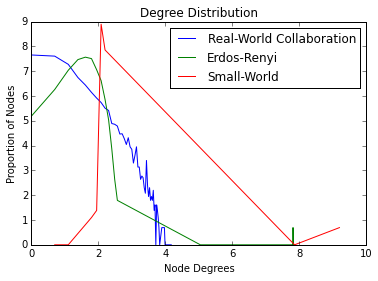

In [138]:
plt.plot(np.log(np.unique(g1)), np.log(g1_n),label='Real-World Collaboration')
plt.plot(np.log(np.unique(g2)), np.log(g2_n),label='Erdos-Renyi')
plt.plot(np.log(np.unique(g3)), np.log(g3_n),label='Small-World')
plt.title('Degree Distribution')
plt.xlabel('Node Degrees')
plt.ylabel('Proportion of Nodes')
plt.legend(loc='best')
plt.show()

# Average Clustering Coefficient

In [46]:
NodeVec = snap.TIntV()
CC = []
for N in G3.Nodes():
    
    E = 0
    
    K = snap.GetNodesAtHop(G3, N.GetId(), 1, NodeVec, True)
    
    for subset in itertools.combinations(NodeVec, 2):
        if G3.IsEdge(subset[0],subset[1]):
            E += 1
            
    K = K*(K-1)
    
    if K > 0:     
        
        CC.append(2*E/float(K))        
    
print "Average Clustering Coefficient of Real World Collaboration Network : ", sum(CC)/float(G3.GetNodes())

CC = []
for N in G4.Nodes():
    
    E = 0
    
    K = snap.GetNodesAtHop(G4, N.GetId(), 1, NodeVec, True)
    
    for subset in itertools.combinations(NodeVec, 2):
        if G4.IsEdge(subset[0],subset[1]):
            E += 1
            
    K = K*(K-1)
    
    if K > 0:     
        
        CC.append(2*E/float(K))        
    
print "Average Clustering Coefficient of Erdos-Renyi Network : ", sum(CC)/float(G4.GetNodes())

CC = []
for N in G5.Nodes():
    
    E = 0
    
    K = snap.GetNodesAtHop(G5, N.GetId(), 1, NodeVec, True)
    
    for subset in itertools.combinations(NodeVec, 2):
        if G5.IsEdge(subset[0],subset[1]):
            E += 1
            
    K = K*(K-1)
    
    if K > 0:     
        
        CC.append(2*E/float(K))        
    
print "Average Clustering Coefficient of Small-World Network : ", sum(CC)/float(G5.GetNodes())

Average Clustering Coefficient of Real World Collaboration Network :  0.471439052967
Average Clustering Coefficient of Erdos-Renyi Network :  0.406961060654
Average Clustering Coefficient of Small-World Network :  0.682612086569


# Largest Connected Component

In [61]:
Components = snap.TCnComV()
snap.GetSccs(G3, Components)

print "Size largest connected component in Real-World Collaboration Nwtwork : ", Components[0].Len()

snap.GetSccs(G4, Components)

print "Size largest connected component in Erdos-Renyi Nwtwork : ", Components[0].Len()

snap.GetSccs(G5, Components)

print "Size largest connected component in Small-World Nwtwork : ", Components[0].Len()

print "Fraction of nodes in the largest connected component in Real-World Collaboration Nwtwork : ", snap.GetMxSccSz(G3)
print "Fraction of nodes in the largest connected component in Erdos-Renyi Network : ", snap.GetMxSccSz(G4)
print "Fraction of nodes in the largest connected component in Small-World Network : ", snap.GetMxSccSz(G5)

Size largest connected component in Real-World Collaboration Nwtwork :  8638
Size largest connected component in Erdos-Renyi Nwtwork :  9845
Size largest connected component in Small-World Nwtwork :  9877
Fraction of nodes in the largest connected component in Real-World Collaboration Nwtwork :  0.874557051736
Fraction of nodes in the largest connected component in Erdos-Renyi Network :  0.996760149843
Fraction of nodes in the largest connected component in Small-World Network :  1.0


# Diameter

In [65]:
print "Diameter of Real-World Collaboration Nwtwork : ", snap.GetBfsFullDiam(G3, 1000, False)
print "Diameter of Erdos-Renyi Network : ", snap.GetBfsFullDiam(G4, 1000, False)
print "Diameter of Small-World Network : ", snap.GetBfsFullDiam(G5, 1000, False)

Diameter of Real-World Collaboration Nwtwork :  18
Diameter of Erdos-Renyi Network :  4
Diameter of Small-World Network :  3
